In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from skimage import filters
import sys
sys.path.append(r'C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src')
import os
from GridMetrics import GridScorer, circle_mask, get_even_odd_times, GridParameters, create_new_result_dir, load_grid_metrics_from_pickle
import scipy.ndimage as ndimage
from skimage.feature import peak_local_max
import json
%load_ext autoreload
%autoreload 2

In [2]:
rat = 'r1'
mod = '2'

G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)

Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r12 already exists


In [25]:
with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
    cell_trial_dict = json.load(f)

In [32]:
accepted_cells = np.zeros(len(G.spikes))
    
for cell in cell_trial_dict:
    none_trials = 0
    for trial in cell_trial_dict[cell]:
        if cell_trial_dict[cell][trial]['spacing_odd'] is None:
            none_trials += 1
        elif cell_trial_dict[cell][trial]['spacing_even'] is None:
            none_trials += 1
            
    if none_trials <= 5:
        accepted_cells[int(cell)] = 1 

In [37]:
# Sample dictionary
my_dict = G.spikes

# Step 1: Convert the dictionary to a list of tuples
dict_items = list(my_dict.items())

# Step 2: Sort the list of tuples by keys
sorted_items = sorted(dict_items, key=lambda x: x[0])

print(len(dict_items))

# Step 3: Create a 3D NumPy array
max_index = len(my_dict.keys())
shape = (len(my_dict.keys()), len(my_dict[0]))
spikes = np.zeros(shape)

# Step 5: Populate the NumPy array
for index, value in my_dict.items():
    spikes[index, :] = value

from scipy.io import savemat
savemat(session_results_directory + 'spikes.mat', {'spikes': spikes})

# save to mat also G.x and G.y
x = np.array([G.x])
savemat(session_results_directory + 'x.mat', {'x': x})

y = np.array([G.y])
savemat(session_results_directory + 'y.mat', {'y': y})

savemat(session_results_directory + 'accepted_cells.mat', {'accepted_cells': accepted_cells})

168


In [21]:
print(arr[0, :])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
# Save G.x in a format that can be imported to Matlab

ValueError: Expected 1D or 2D array, got 0D array instead

# Figure 0A: cell spatial activity

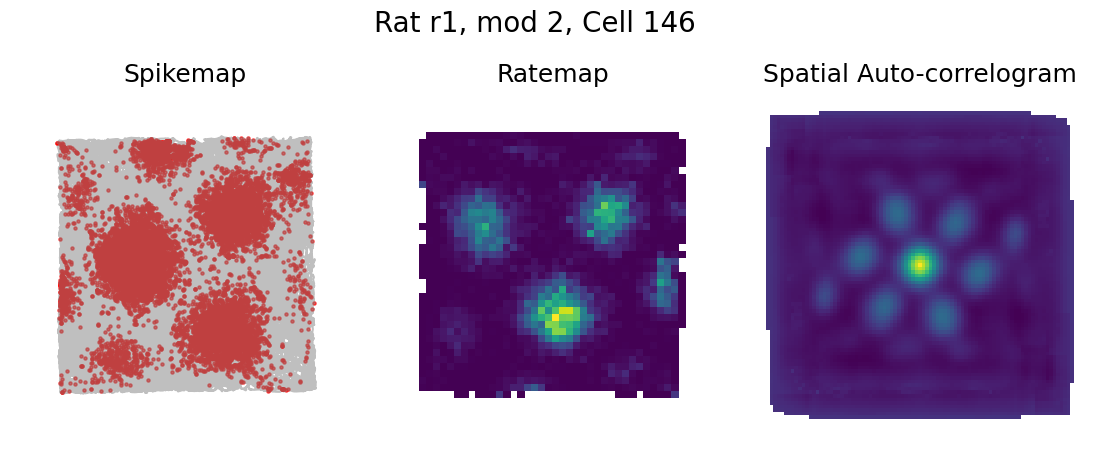

In [7]:
cell = 146

ratemap = G.Scorer.calculate_ratemap(cell = cell)
mask = G.Scorer.get_ring_mask(G.mask_radius, 1)
sac = G.Scorer.calculate_sac(cell)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
# set figure title
fig.suptitle('Rat ' + str(rat) +', mod ' + mod + ', Cell {}'.format(cell), fontsize = 20)
# bring figure closer to title
fig.subplots_adjust(top=1)
# have less space between subplots
fig.subplots_adjust(wspace=0.05)

axes[0].plot( G.x,  G.y, color='grey', alpha=0.5)
axes[0].scatter(G.x[G.spikes[cell] != 0], G.y[G.spikes[cell] != 0], color='red', alpha=0.7, s=5)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)
axes[0].set_title('Spikemap', fontsize = 18)

axes[1].pcolor(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50), ratemap)
axes[1].set_title('Ratemap', fontsize = 18)

masked_sac = np.ma.masked_where(sac == 0, sac)
cmap = matplotlib.colormaps['viridis']
cmap.set_bad(color='white')
axes[2].imshow(masked_sac)

axes[2].set_title('Spatial Auto-correlogram', fontsize = 18)

for ax in axes:
    ax.set_aspect('equal')
    ax.axis('off')
    
fig_directory = r'C:/Users/acostamendoza/Documents/Code/Grid-orientation-project/figures/figure_2'
fig.savefig(os.path.join(fig_directory + '/A_method.svg'), dpi=300)

C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src\GridMetrics.py:217: RuntimeWarning: invalid value encountered in divide
  x_coef = np.real(x_coef)


0.20202020202020204

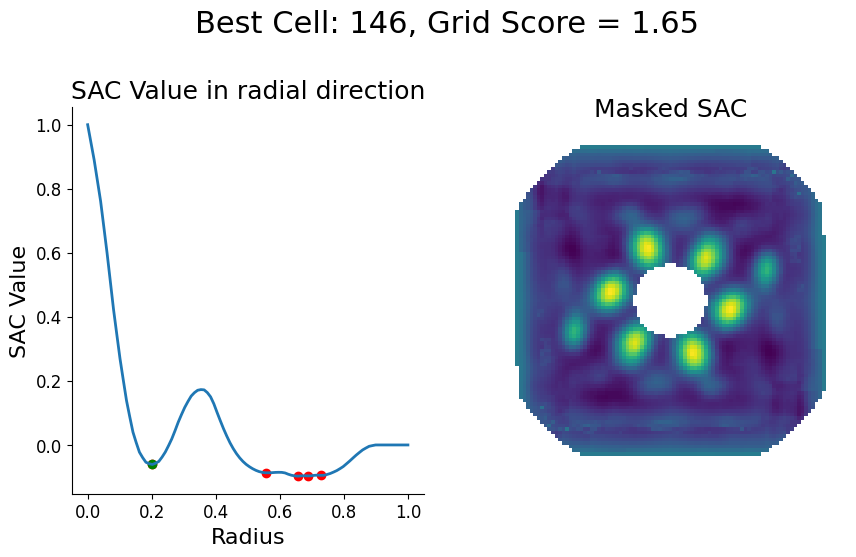

In [138]:
G.get_mask_radius(plot_result=True)

# Figure 0B: Computing the bumps in the SAC

C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src\GridMetrics.py:217: RuntimeWarning: invalid value encountered in divide
  x_coef = np.real(x_coef)


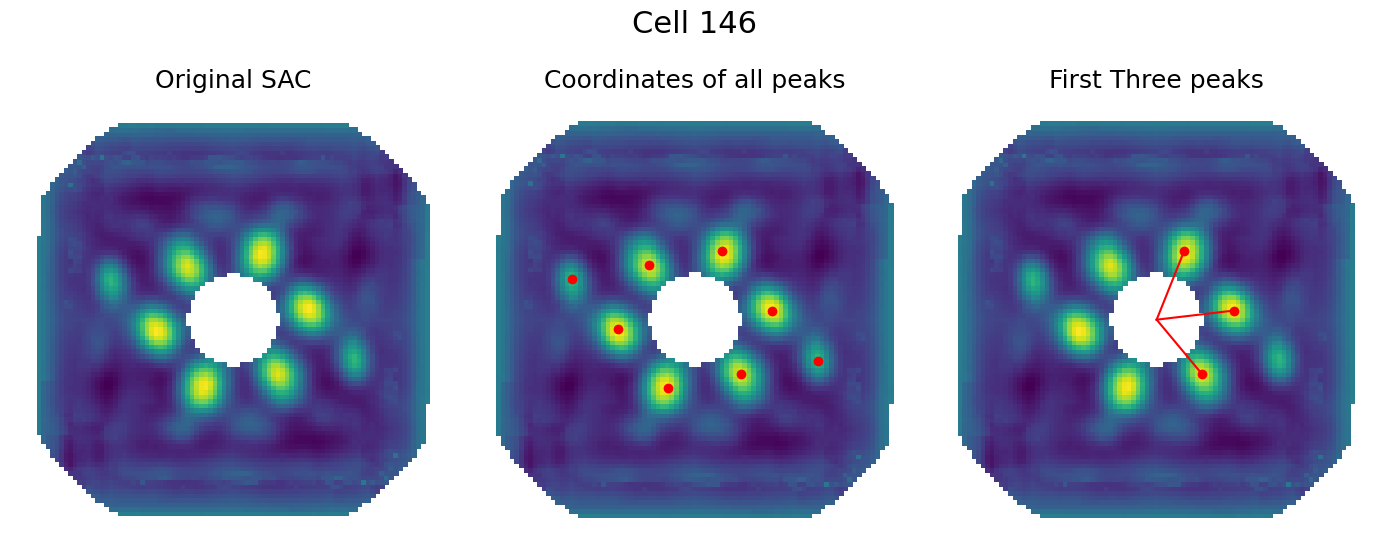

In [125]:
G.show_coordinates_of_peaks(146)

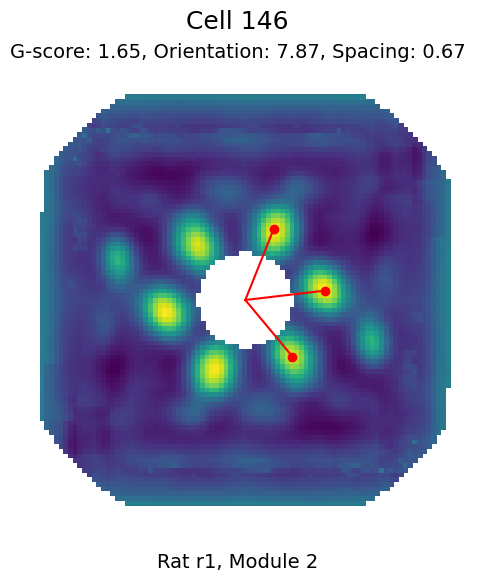

In [6]:
G.show_orientation_and_spacing(146)
plt.savefig(os.path.join(fig_directory + '/A_method_example.svg'), dpi=1200)

# Figure 0C: Extra considerations

When given the three peaks we also ask for:
1. **Orientations**
    - The minimum difference between every combination of peaks has to be at least 30 degrees 
    - The maximum difference between every combination of peaks has to be at most 180 degrees
2. **Spacing**
    - The ratio of any peak spacing to any other peak can't be lesser than half
    - The ratio of any peak spacing to any other peak can't be greater than double

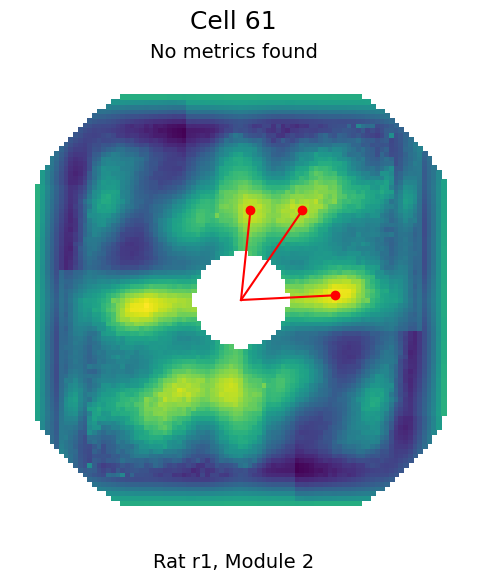

In [143]:
G.show_orientation_and_spacing(61)

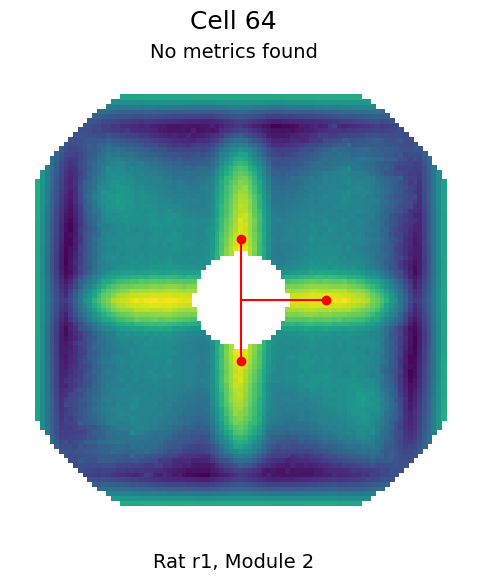

In [144]:
G.show_orientation_and_spacing(64)

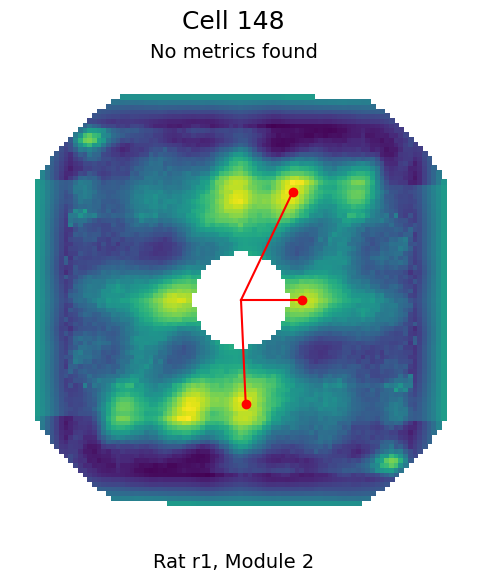

In [145]:
G.show_orientation_and_spacing(148)

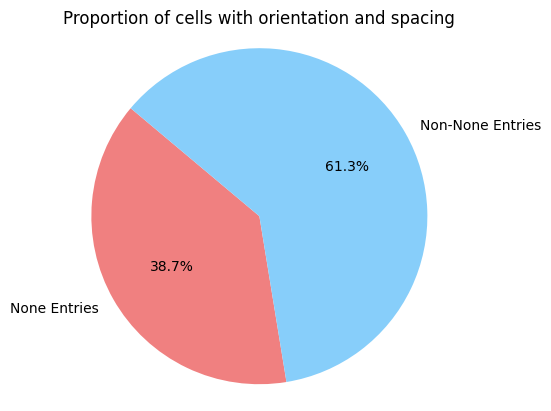

In [5]:
count_none = G.orientation.count(None)
count_non_none = len(G.orientation) - count_none

labels = ['None Entries', 'Non-None Entries']
sizes = [count_none, count_non_none]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Proportion of cells with orientation and spacing')
plt.show()